In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

# Zadanie 6. (4 punkty)
W pakiecie SciKit do Pythona dostępnych jest kilka popularnych metod redukcji wymiarowości i manifold learning (czyli metod wyznaczania rozmaitości różniczkowalnej, na której znajdują się rozpatrywane dane). Zapoznaj się z nimi wykonując skrypt umieszczony w materiałach do wykładu. Sprawdź jaki wpływ na działanie tych metod mają ich parametry.


## Wprowadzenie

Skrypt pokazuje jak używać pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [10]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

## Wczytanie danych

In [11]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

## Wyświetlenie przykładowych cyfr

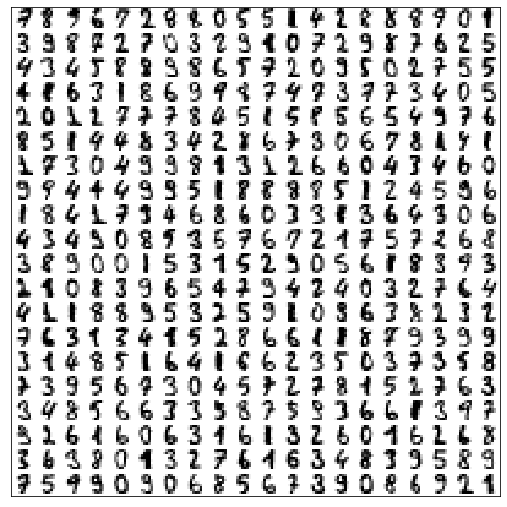

In [12]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

## Rzut na dwie losowo wybrane osie

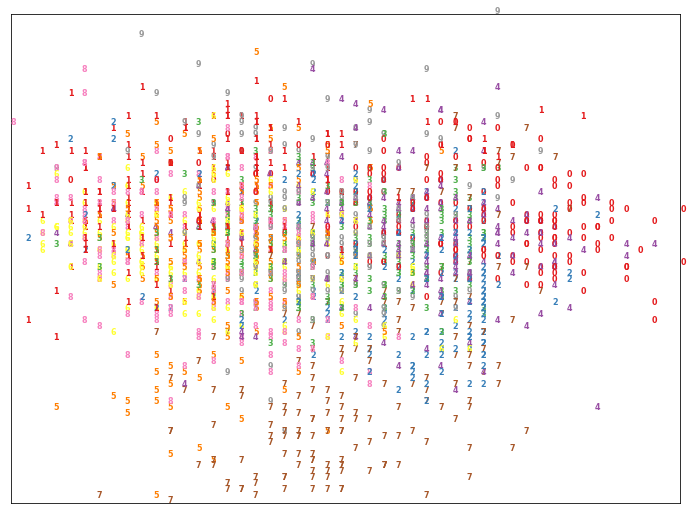

In [19]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

## Principal Component Analysis (PCA)

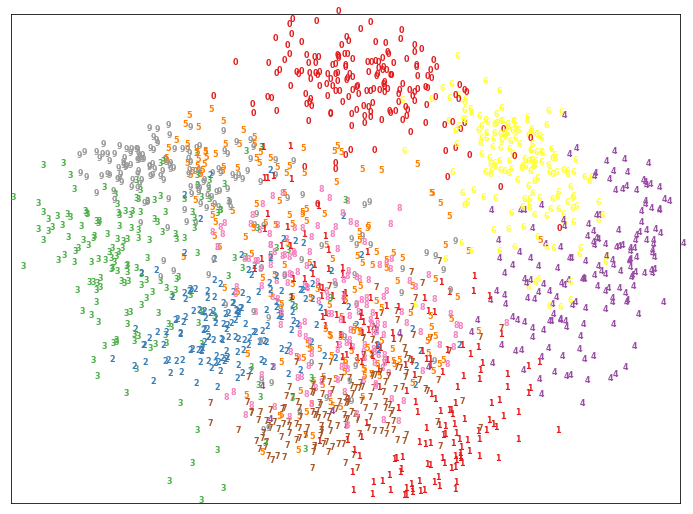

In [20]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_digits(X_pca, digits.target)

## Kernel Principal Component Analysis (KPCA)

### Gamma = 10

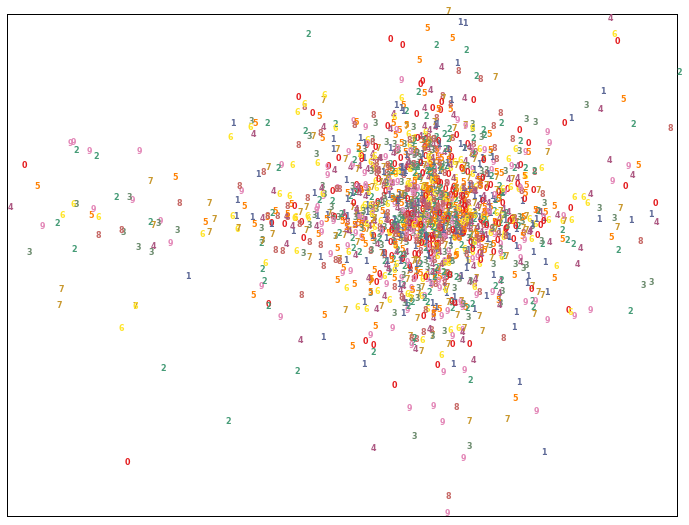

In [7]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

### Gamma = 3

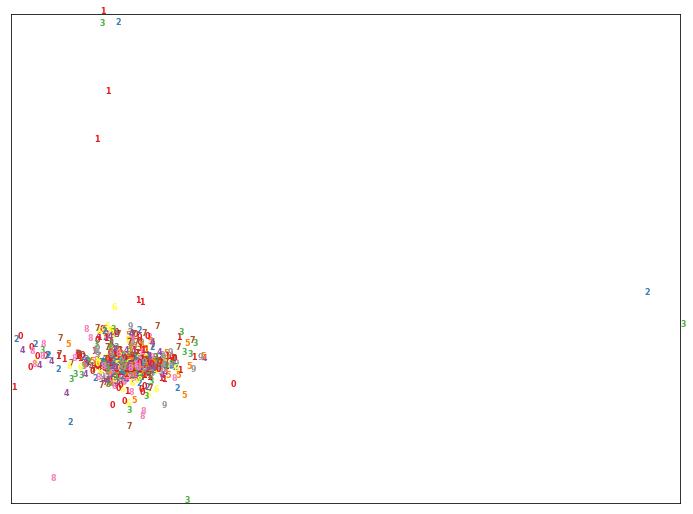

In [30]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=3).fit_transform(X)
plot_digits(X_kpca, digits.target)

### Gamma = 100

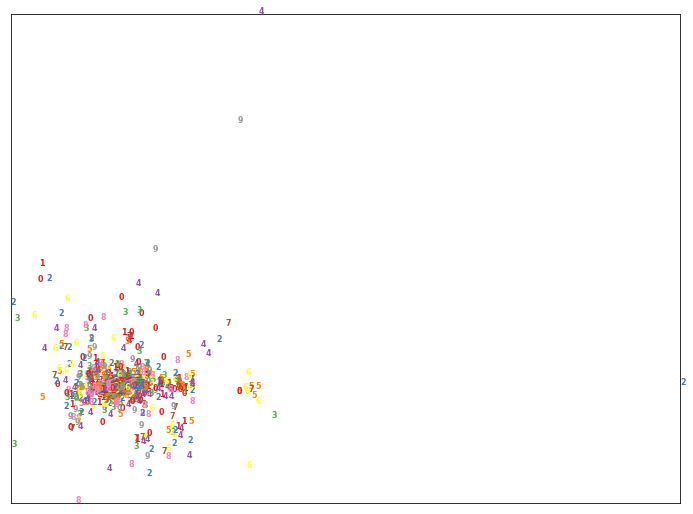

In [24]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=100).fit_transform(X)
plot_digits(X_kpca, digits.target)

## Isomap

### N_neighbors = 30

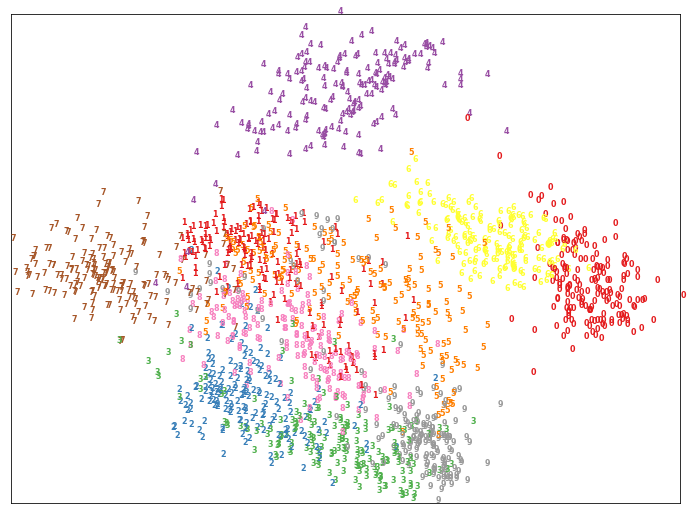

In [25]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

### N_neighbors = 10

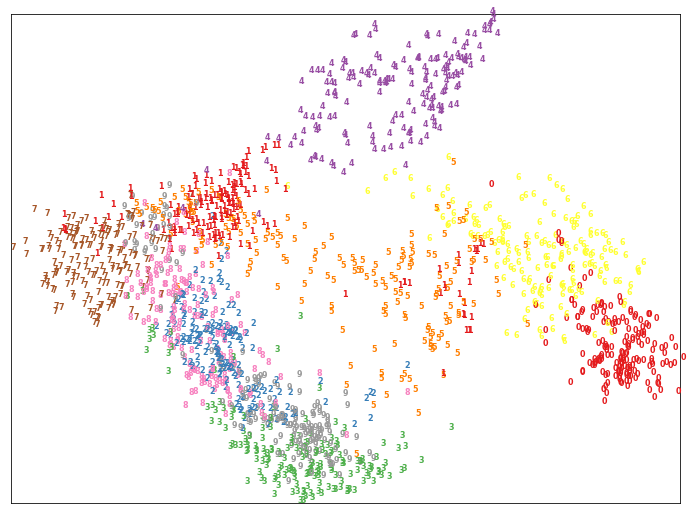

In [26]:
X_iso = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

### N_neighbors = 500

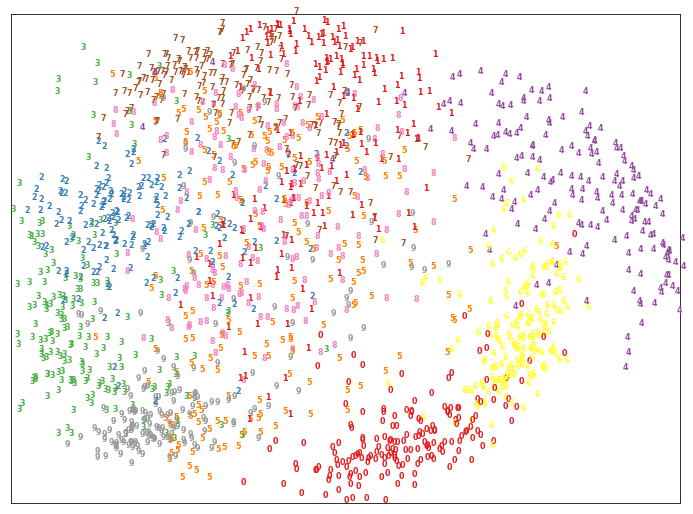

In [29]:
X_iso = manifold.Isomap(n_neighbors=500, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

## Locally Linear Embedding (LLE)

### N_neighbors = 30

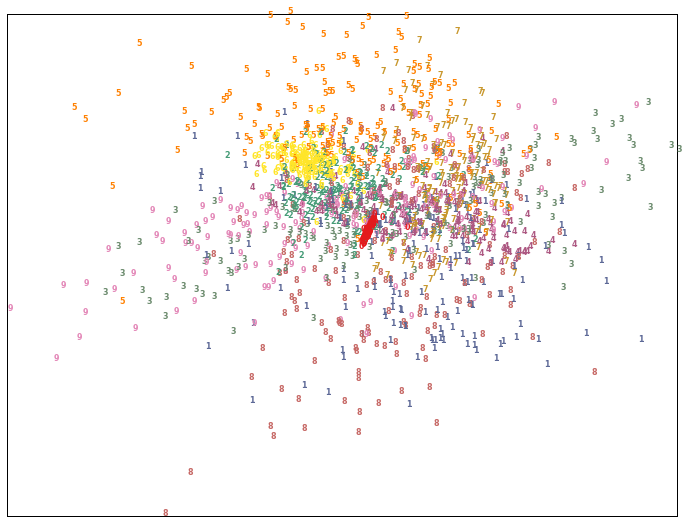

In [9]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

### N_neighbors = 10

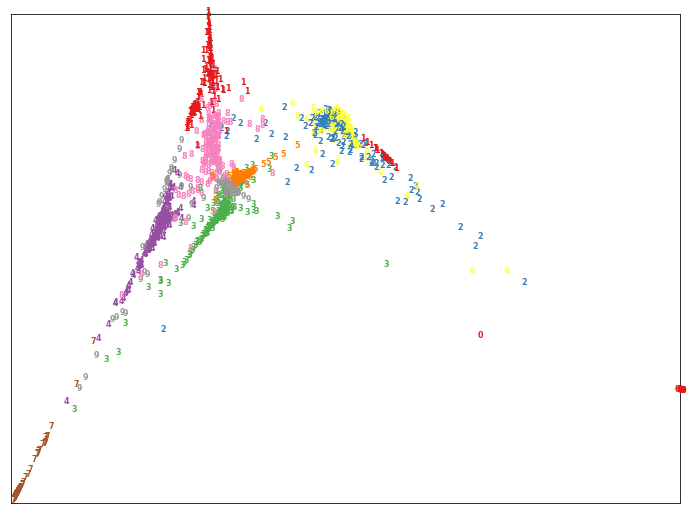

In [31]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

### N_neighbors = 500

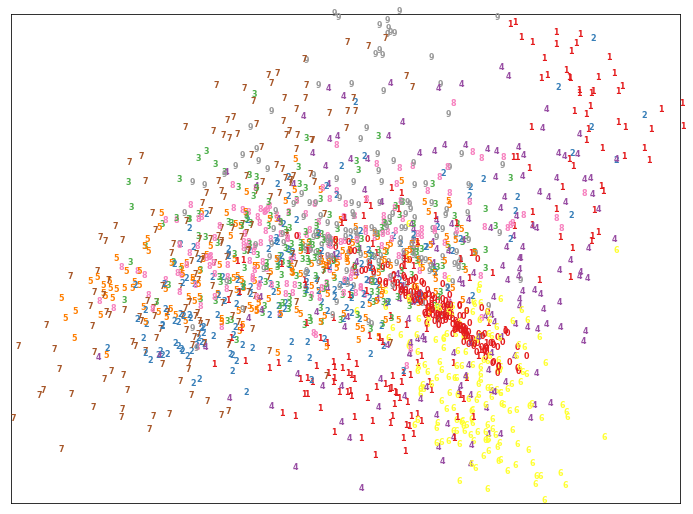

In [34]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=100, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

## Multidimensional Scaling (MDS)

### Max_iter = 100

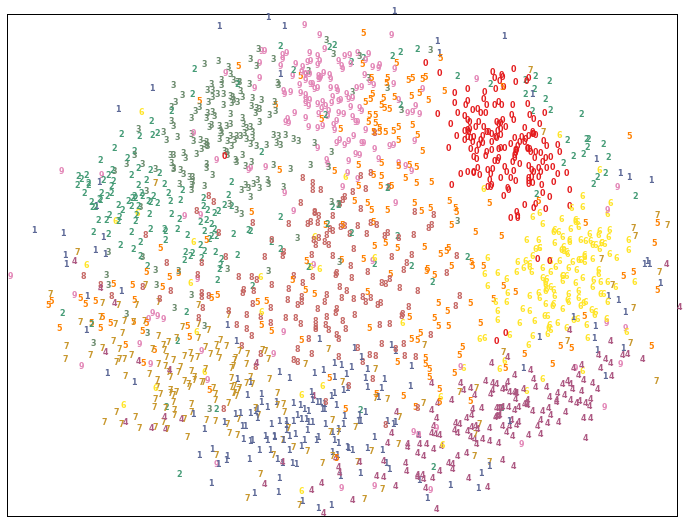

In [10]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

### Max_iter = 10

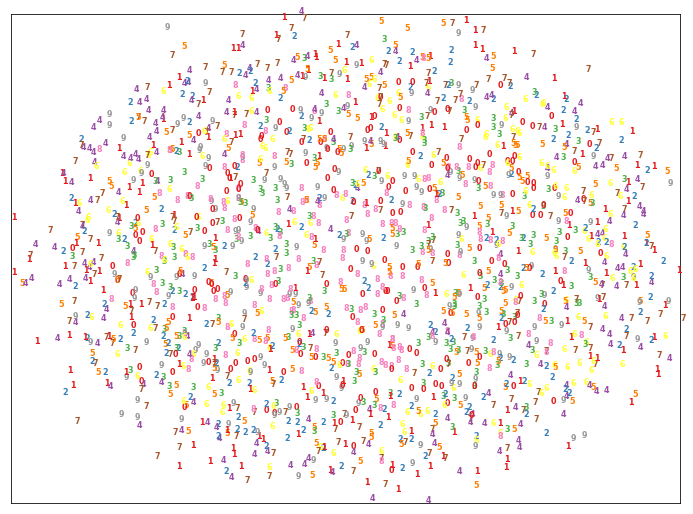

In [35]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=10).fit_transform(X)
plot_digits(X_mds, digits.target)

### Max_iter = 1000

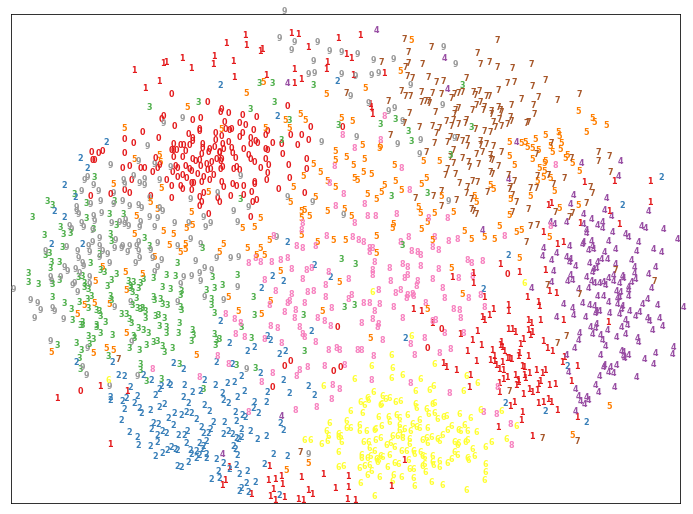

In [36]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=1000).fit_transform(X)
plot_digits(X_mds, digits.target)

## t-distributed Stochastic Neighbor Embedding (t-SNE)

### Init = 'pca'

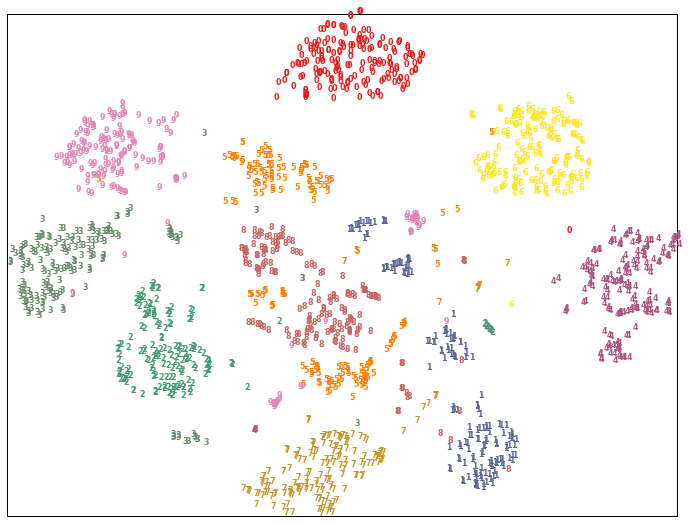

In [11]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

### Init = 'random'

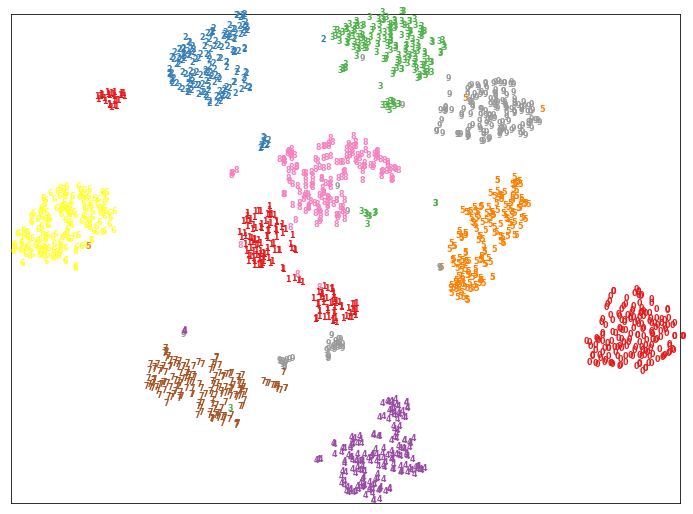

In [38]:
X_tsne = manifold.TSNE(n_components=2, init='random').fit_transform(X)
plot_digits(X_tsne, digits.target)